In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import talib as ta
import pynance as pn
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/AAPL_historical_data.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


### Apply Analysis Indicators with TA-Lib
The Relative Strength Index (RSI) is a momentum oscillator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. It typically ranges from 0 to 100.

**RSI above 70**: Generally considered overbought, suggesting the asset may be due for a price correction.

**RSI below 30**: Generally considered oversold, suggesting the asset may be due for a price bounce.

**RSI between 30 and 70**: Considered to be in a neutral range.

In [4]:
data_close = np.array(data['Close']).flatten()

# Calculate moving averages
data['SMA_20'] = ta.SMA(data_close, timeperiod=20)
data['EMA_50'] = ta.EMA(data_close, timeperiod=50)

# Calculate RSI
data['RSI_14'] = ta.RSI(data_close, timeperiod=14)

# Calculate MACD
data['MACD'], data['MACD_signal'], data['MACD_hist'] = ta.MACD(data_close, fastperiod=12, slowperiod=26, signalperiod=9)

# Display the updated DataFrame with indicators
print(data.tail(10))


             Date        Open        High         Low       Close   Adj Close  \
10988  2024-07-17  229.449997  231.460007  226.639999  228.880005  228.615387   
10989  2024-07-18  230.279999  230.440002  222.270004  224.179993  223.920807   
10990  2024-07-19  224.820007  226.800003  223.279999  224.309998  224.050659   
10991  2024-07-22  227.009995  227.779999  223.089996  223.960007  223.701080   
10992  2024-07-23  224.369995  226.940002  222.679993  225.009995  224.749847   
10993  2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
10994  2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
10995  2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
10996  2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
10997  2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

         Volume  Dividends  Stock Splits      SMA_20      EMA_50     RSI_14  \
10988  57345900        0.0   

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

# Get the maximum start and end dates
max_start_date = data['Date'].min()  
max_end_date = data['Date'].max()   

print(f"Maximum Start Date: {max_start_date}")
print(f"Maximum End Date: {max_end_date}")

Maximum Start Date: 1980-12-12 00:00:00
Maximum End Date: 2024-07-30 00:00:00


In [ ]:
data = pn.data.get('AAPL', start='2022-01-01', end='2024-12-15')
print(data.head())

               Open      High       Low   Close      Volume
Date                                                       
2024-12-13  247.815  249.2902  246.2400  248.13  33155290.0
2024-12-12  246.890  248.7400  245.6800  247.96  32777532.0
2024-12-11  247.960  250.8000  246.2601  246.49  45205814.0
2024-12-10  246.890  248.2100  245.3400  247.77  36914806.0
2024-12-09  241.830  247.2400  241.7500  246.75  44649232.0


In [11]:
# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change()

# Display basic statistics of daily returns
print(data['Daily Return'].describe())


count    741.000000
mean      -0.000293
std        0.017084
min       -0.081710
25%       -0.009549
50%       -0.001002
75%        0.008501
max        0.062345
Name: Daily Return, dtype: float64


In [12]:
# Calculate 20-day simple moving average (SMA)
data['SMA_20'] = data['Close'].rolling(window=20).mean()

# Calculate 20-day exponential moving average (EMA)
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()

# Display the data with SMA and EMA
print(data[['Close', 'SMA_20', 'EMA_20']].tail())


              Close     SMA_20      EMA_20
Date                                      
2022-01-07  169.584  166.68465  167.275811
2022-01-06  169.414  166.65455  167.479448
2022-01-05  172.290  166.75380  167.937596
2022-01-04  177.002  166.94400  168.800873
2022-01-03  179.272  167.30845  169.798123


This data represents the stock closing prices, 20-day Simple Moving Average (SMA_20), and 20-day Exponential Moving Average (EMA_20) for five consecutive trading days, starting from January 3, 2022, to January 7, 2022.
#### **Key Takeaways:**

- From **January 3 to January 7, 2022**, the stock remained above both the **20-day Simple Moving Average (SMA)** and **20-day Exponential Moving Average (EMA)**, suggesting a **bullish trend**.
- Despite the slight decrease in price from **179.272** to **169.584**, the stock is still **above both moving averages**, which indicates a **strong uptrend**.
- The **EMA** is generally lower than the **SMA**, which indicates a more **responsive nature** to recent price changes, while the **SMA** smooths out the fluctuations, showing a more stable trend.

#### **Implications for Traders:**

- **Buying Opportunity:** A close above both the SMA and EMA suggests strength, and traders may consider **buying the stock**.
- **Trend Reversal Warning:** If the stock price falls below both moving averages, it may signal a **trend reversal** and a potential **downtrend**.

#### **Conclusion:**

The stock showed consistent **bullish behavior** over the five days analyzed, staying above both the **SMA** and **EMA**. Traders and investors should watch for any breaks below these levels, as it could indicate a shift in market sentiment.

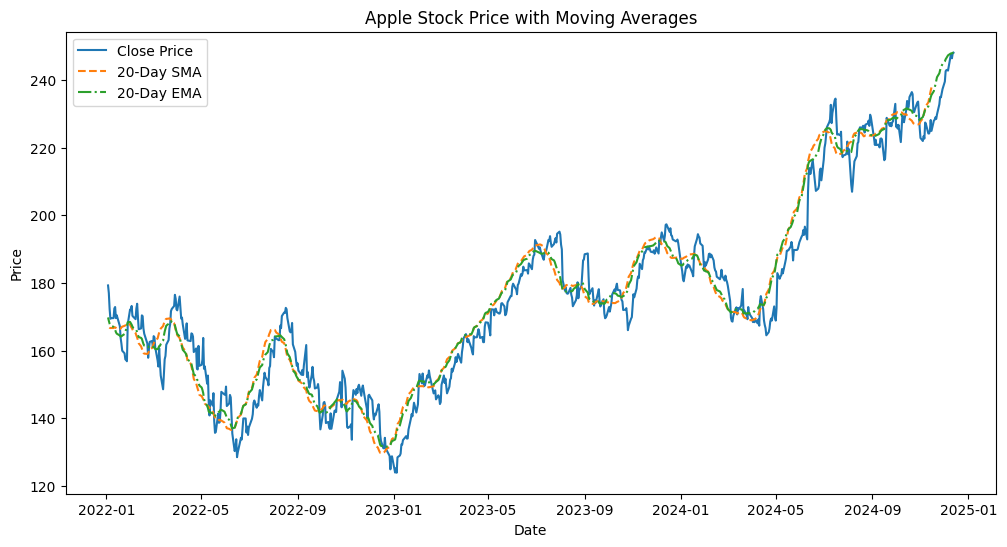

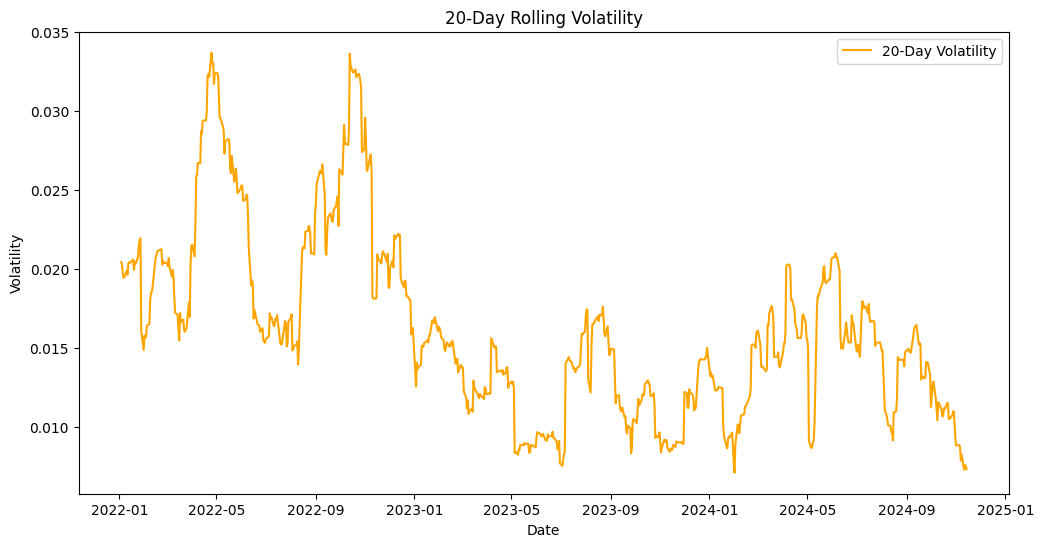

In [ ]:
# Calculate 20-day rolling volatility (standard deviation of daily returns)
data['Volatility_20'] = data['Daily Return'].rolling(window=20).std()

# Plot closing prices, SMA, and EMA
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_20'], label='20-Day SMA', linestyle='--')
plt.plot(data['EMA_20'], label='20-Day EMA', linestyle='-.')
plt.title('Apple Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot Volatility
plt.figure(figsize=(12, 6))
plt.plot(data['Volatility_20'], label='20-Day Volatility', color='orange') 
plt.title('20-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()